# Credit Card Fraud Detection

**Importing Dependencies**

In [ ]:
!pip install xgboost

In [ ]:
!pip install shap

In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, accuracy_score, recall_score, precision_score, f1_score, average_precision_score, make_scorer

### 1. Data Exploration and Preprocessing

**Goal: Analyze and prepare the data for model training.**<br>
**Steps:**
- **Summarize key statistics of the dataset, including class distribution, feature distribution, and any missing values.**
- **Handle any missing values and perform required transformations (e.g., scaling or normalizing).**
- **Imbalance Handling: Use an imbalance handling technique, such as undersampling, SMOTE, or class weights during training.**<br>

**Deliverable: Documented analysis and preprocessing steps, ideally in a Jupyter 
notebook.**

In [4]:
# Loading the dataset file
credit_card_data = pd.read_csv('creditcard.csv')
# print shape of dataset with rows and columns
print(credit_card_data.shape)

(284807, 31)


In [5]:
# first 3 rows of the dataset
credit_card_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
# last 3 rows of the dataset
credit_card_data.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
credit_card_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# checking the number of missing values in each column.
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Here we can see that we don't have any missing values in this data**

In [11]:
# Check the descriptive statistics of numeric variables
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Checking the distribution of the target variable (fraudulent (1) vs. non_fraudulent transactions (0))**

In [13]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
100*credit_card_data['Class'].value_counts()/len(credit_card_data['Class'])

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

**The dataset is highly imbalanced, with fraudulent transactions making up a very small fraction of the total data.**

In [16]:
# checking for duplicates values
credit_card_data.duplicated().sum()

1081

In [17]:
# Removing duplicates reduces data redundancy
credit_card_data = credit_card_data.drop_duplicates()
credit_card_data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

**Since most of our data has already been scaled we should scale the columns that are left to scale (Amount & time)**

In [19]:
# RobustScaler is less prone to outliers
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
credit_card_data['scaled_amount'] = rob_scaler.fit_transform(credit_card_data['Amount'].values.reshape(-1,1))
credit_card_data['scaled_time'] = rob_scaler.fit_transform(credit_card_data['Time'].values.reshape(-1,1))
credit_card_data.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = credit_card_data['scaled_amount']
scaled_time = credit_card_data['scaled_time']
credit_card_data.drop(['scaled_amount','scaled_time'], axis=1, inplace=True)
credit_card_data.insert(0, 'scaled_amount', scaled_amount)
credit_card_data.insert(1, 'scaled_time', scaled_time)
credit_card_data.head(3)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0


In [20]:
# Separating the data for analysis
non_fraudulent = credit_card_data[credit_card_data.Class==0]
fraudulent = credit_card_data[credit_card_data.Class==1]
print(non_fraudulent.shape)
print(fraudulent.shape)

(283253, 31)
(473, 31)


In [21]:
# Statistical meansures of the data
non_fraudulent.scaled_amount.describe()

count    283253.000000
mean          0.923565
std           3.481839
min          -0.305938
25%          -0.227089
50%           0.000000
75%           0.771242
max         356.962314
Name: scaled_amount, dtype: float64

In [23]:
fraudulent.scaled_amount.describe()

count    473.000000
mean       1.416658
std        3.618565
min       -0.305938
25%       -0.292032
50%       -0.169378
75%        1.166597
max       29.256988
Name: scaled_amount, dtype: float64

In [40]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Class,,,,,,,,,,,,,,,,,,,,,
0,0.923565,0.119193,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,...,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418
1,1.416658,-0.049851,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,...,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270


**Here we are using undersampling as imbalance handling technique. Build a sample dataset containing similar distribution of non_fraudulent and fraudulent.**<br>
**Number of fraudulent transactions = 473**

In [43]:
non_fraudulent_sample = non_fraudulent.sample(n=473)

**Concatenating two DataFrames**

In [46]:
new_dataset = pd.concat([non_fraudulent_sample,fraudulent], axis=0)
# Shuffle dataframe rows
new_dataset = new_dataset.sample(frac=1, random_state=104)
new_dataset = new_dataset.reset_index(drop=True)
new_dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,9.333890,0.789269,0.695087,-2.570941,-1.623645,0.686052,-0.967187,-0.129365,0.515870,-0.175081,...,1.184244,0.411233,-0.272745,-0.436602,-0.434089,-0.527159,0.477314,-0.193508,0.047603,0
1,1.084550,-0.658507,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,...,1.706889,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,1
2,-0.296482,-0.648306,1.102804,2.829168,-3.932870,4.707691,2.937967,-1.800904,1.672734,-0.300240,...,-0.030880,-0.106994,-0.250050,-0.521627,-0.448950,1.291646,0.516327,0.009146,0.153318,1
3,-0.292032,0.004354,-0.781871,0.305924,0.746177,-3.099567,1.894670,3.488003,-0.288570,1.101633,...,0.147062,-0.064440,-0.066605,-0.398805,1.003504,0.733593,-0.741682,0.356854,0.131194,0
4,1.084550,-0.657367,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,...,1.733644,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,1


Distribution of the Classes in the subsample dataset
Class
0    473
1    473
Name: count, dtype: int64


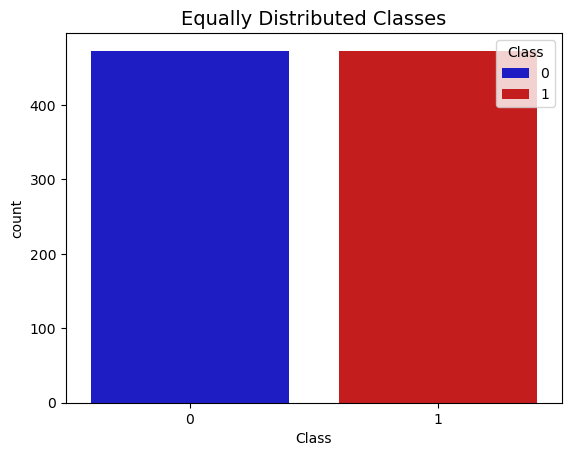

In [48]:
print('Distribution of the Classes in the subsample dataset')
print(new_dataset['Class'].value_counts())
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=new_dataset, hue='Class', palette=colors, legend=True)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**Correlation Matrics:- For understanding our data and in order to see which features have a high positive or negative correlation with regards to fraud transactions.**

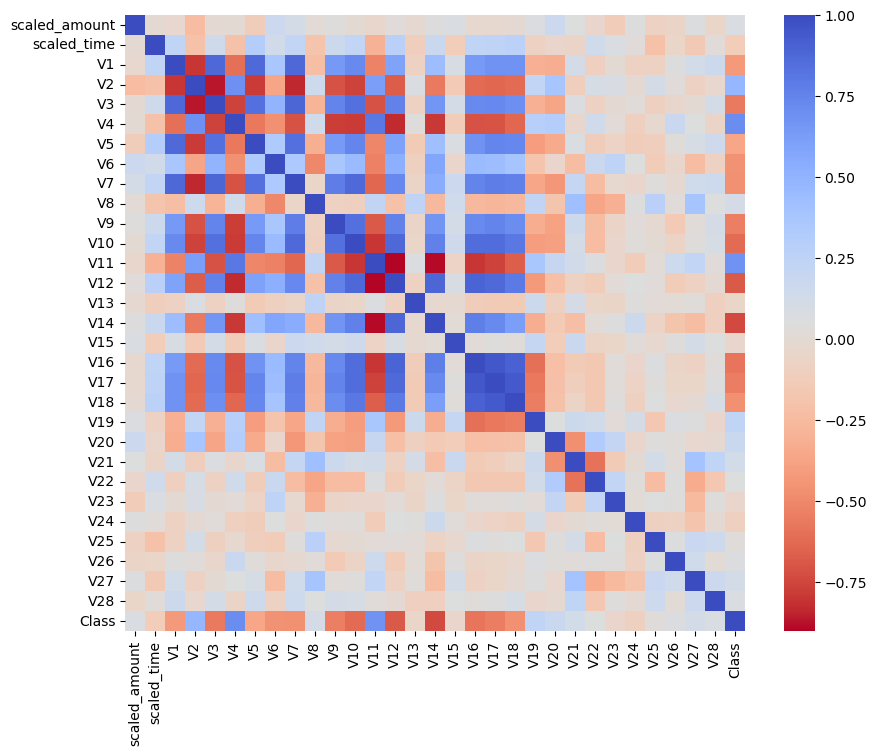

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
sub_sample_corr = new_dataset.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
plt.show()

**Negative Correlations:- V17, V14, V12, V10.**<br>
**Positive Correlations:- V2, V4, V11 & V19.**

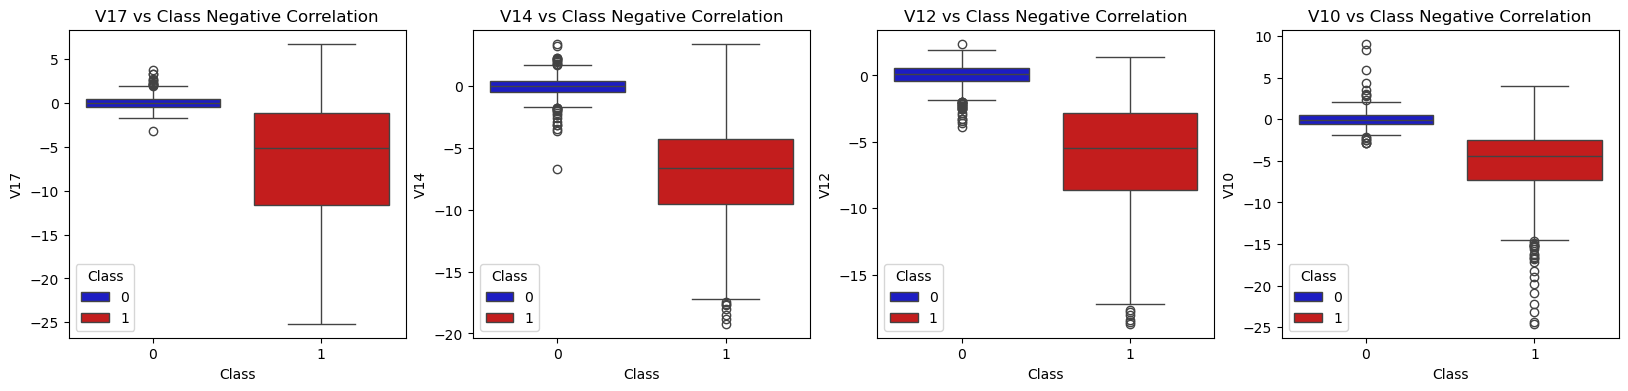

In [54]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ["#0101DF", "#DF0101"]
# Negative Correlations with our Class (lower the feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_dataset, hue='Class', palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=new_dataset, hue='Class', palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=new_dataset, hue='Class', palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=new_dataset, hue='Class', palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

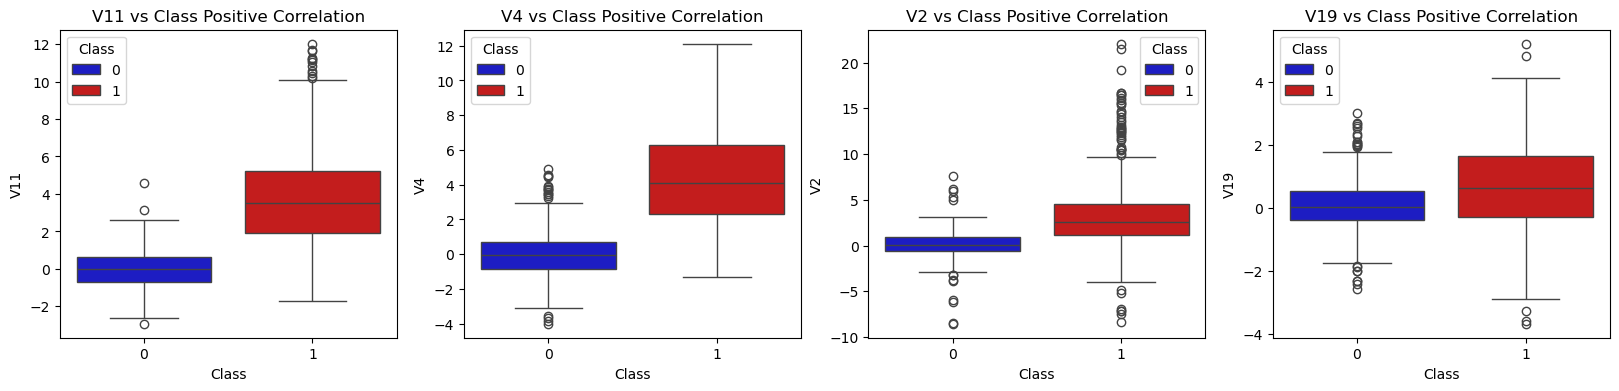

In [56]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ["#0101DF", "#DF0101"]
# Positive correlations (higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_dataset, hue='Class', palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=new_dataset, hue='Class', palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=new_dataset, hue='Class', palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=new_dataset, hue='Class', palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

**Removing "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.**

In [59]:
# V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_dataset['V14'].loc[new_dataset['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_dataset = new_dataset.drop(new_dataset[(new_dataset['V14'] > v14_upper) | (new_dataset['V14'] < v14_lower)].index)
print('----' * 44)

# V12 removing outliers from fraud transactions
v12_fraud = new_dataset['V12'].loc[new_dataset['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_dataset = new_dataset.drop(new_dataset[(new_dataset['V12'] > v12_upper) | (new_dataset['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_dataset)))
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud = new_dataset['V10'].loc[new_dataset['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_dataset = new_dataset.drop(new_dataset[(new_dataset['V10'] > v10_upper) | (new_dataset['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_dataset)))

Quartile 25: -9.50514082568186 | Quartile 75: -4.25246559869278
iqr: 5.25267522698908
Cut Off: 7.87901284048362
V14 Lower: -17.38415366616548
V14 Upper: 3.62654724179084
Feature V14 Outliers for Fraud Cases: 7
V10 outliers:[-19.2143254902614, -18.8220867423816, -17.7216383537133, -17.6206343516773, -18.0499976898594, -18.4937733551053, -17.4759212828566]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -16.971245282033493
V12 Upper: 5.672071569485119
V12 outliers: [-17.003289445516, -17.1829184301947, -18.5536970096458, -17.1504052507291, -18.6837146333443, -18.0475965708216, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 7
Number of Instances after outliers removal: 932
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
new_dataset.groupby('Class').mean()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Class,,,,,,,,,,,,,,,,,,,,,
0,0.910892,0.092164,0.004033,0.058587,0.082048,-0.057443,0.006681,0.164242,-0.038802,0.066966,...,0.067406,0.026501,-0.016144,-0.025194,-0.010813,0.007463,-0.002693,-0.012290,-0.003693,0.017830
1,1.519640,-0.036832,-3.646869,2.797823,-5.693905,4.046239,-2.220227,-1.368020,-3.905410,1.201278,...,0.575653,0.286380,0.701061,-0.043380,-0.146564,-0.132334,0.075044,0.055441,0.356644,0.103842


### 2. Model Development (Supervised)

**Goal: Train a supervised model to classify fraudulent vs. non-fraudulent transactions.**<br>
**Steps:** 
- **Start with a baseline model (e.g., Logistic Regression) to establish a starting point.**
- **Train an XGBoost model (or similar) as the primary supervised model.**
- **Perform basic hyperparameter tuning to optimize for accuracy and recall.**<br>

**Deliverable: Code to train both models and a summary of performance metrics (accuracy, recall, precision, F1-score).**

**Splitting the dataset into features & targets**

In [67]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']
print(X)
print(y)

     scaled_amount  scaled_time         V1         V2         V3        V4  \
0         9.333890     0.789269   0.695087  -2.570941  -1.623645  0.686052   
1         1.084550    -0.658507 -28.524268  15.876923 -29.468732  6.447591   
2        -0.296482    -0.648306   1.102804   2.829168  -3.932870  4.707691   
3        -0.292032     0.004354  -0.781871   0.305924   0.746177 -3.099567   
4         1.084550    -0.657367 -30.552380  16.713389 -31.103685  6.534984   
..             ...          ...        ...        ...        ...       ...   
941       1.507996    -0.341678  -7.427924   2.948209  -8.678550  5.185303   
942      -0.095119     0.344287   1.720806  -0.016614  -0.062527  3.480127   
943      -0.303157    -0.060551  -0.114361   1.036129   1.984405  3.128243   
944      -0.295369    -0.162933   0.196707   1.189757   0.704882  2.891388   
945      -0.181338     0.824748   2.158485  -0.346855  -2.094247 -1.488504   

            V5        V6         V7         V8  ...       V19  

**Split the data into Training data & Testing data**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [72]:
print(X.shape, X_train.shape, X_test.shape)

(900, 30) (720, 30) (180, 30)


In [74]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        'Classification_Report': classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True),
        'Confusion_Matrix': confusion_matrix(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    print("\nConfusion Matrix:")
    print(metrics['Confusion_Matrix'])
    print(f"\nAccuracy: {metrics['Accuracy']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    return metrics

**Model Training - Logistic Regression**

In [77]:
model = LogisticRegression()

In [79]:
# training the logistic regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

In [82]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: {train_data_accuracy}")

Accuracy on Training data: 0.9597222222222223


In [84]:
# Evaluate Logistic Regression
print("Logistic Regression Performance Metrics:")
logistic_metrics = evaluate_model(model, X_test, y_test)

Logistic Regression Performance Metrics:

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.86      0.97      0.91        94
       Fraud       0.96      0.83      0.89        86

    accuracy                           0.90       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.90      0.90       180


Confusion Matrix:
[[91  3]
 [15 71]]

Accuracy: 0.9000
Recall: 0.8256
Precision: 0.9595
F1-Score: 0.8875


**Model Training - XGBoost with GridSearchCV**

In [98]:
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'subsample': [0.8, 1.0]}

xgb = XGBClassifier(eval_metric='logloss')
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Best XGBoost Model
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


In [99]:
# Evaluate XGBoost
print("XGBoost Performance Metrics:")
xgb_metrics = evaluate_model(best_xgb, X_test, y_test)

XGBoost Performance Metrics:

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.85      0.97      0.91        94
       Fraud       0.96      0.81      0.88        86

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180


Confusion Matrix:
[[91  3]
 [16 70]]

Accuracy: 0.8944
Recall: 0.8140
Precision: 0.9589
F1-Score: 0.8805


**Summary of performance metrics on both models**

In [103]:
summary = pd.DataFrame({'Model': ['Logistic Regression', 'XGBoost'],
                         'Accuracy': [logistic_metrics['Accuracy'], xgb_metrics['Accuracy']],
                         'Recall': [logistic_metrics['Recall'], xgb_metrics['Recall']],
                         'Precision': [logistic_metrics['Precision'], xgb_metrics['Precision']],
                         'F1-Score': [logistic_metrics['F1-Score'], xgb_metrics['F1-Score']]})

print("\nSummary of Model Performance:")
print(summary)


Summary of Model Performance:
                 Model  Accuracy    Recall  Precision  F1-Score
0  Logistic Regression  0.900000  0.825581   0.959459  0.887500
1              XGBoost  0.894444  0.813953   0.958904  0.880503


### 3. Model Development (Unsupervised)

**Goal: Implement an unsupervised model to identify potential fraudulent activities.**<br>
**Steps:**
- **Use an anomaly detection algorithm (e.g., Isolation Forest or Autoencoder) to detect outliers.**
- **Configure the model to detect rare events, capturing transactions that differ significantly from typical patterns.**<br>

**Deliverable: Code and explanation of the unsupervised approach, including sample results or anomalies detected.**<br>
**Note: This unsupervised model is optional but will be given higher preference in evaluations.**

In [108]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']
print(X)
print(y)

     scaled_amount  scaled_time         V1         V2         V3        V4  \
0         9.333890     0.789269   0.695087  -2.570941  -1.623645  0.686052   
1         1.084550    -0.658507 -28.524268  15.876923 -29.468732  6.447591   
2        -0.296482    -0.648306   1.102804   2.829168  -3.932870  4.707691   
3        -0.292032     0.004354  -0.781871   0.305924   0.746177 -3.099567   
4         1.084550    -0.657367 -30.552380  16.713389 -31.103685  6.534984   
..             ...          ...        ...        ...        ...       ...   
941       1.507996    -0.341678  -7.427924   2.948209  -8.678550  5.185303   
942      -0.095119     0.344287   1.720806  -0.016614  -0.062527  3.480127   
943      -0.303157    -0.060551  -0.114361   1.036129   1.984405  3.128243   
944      -0.295369    -0.162933   0.196707   1.189757   0.704882  2.891388   
945      -0.181338     0.824748   2.158485  -0.346855  -2.094247 -1.488504   

            V5        V6         V7         V8  ...       V19  

**Model Training - Isolation Forest**

In [111]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isolation_forest.fit(X)

# Predict anomalies
#anomaly_scores = isolation_forest.decision_function()
anomalies = isolation_forest.predict(X) # -1 for fraud, 1 for normal
anomalies = np.where(anomalies == 1, 0, 1)
# Evaluation
def evaluate_model(y, anomalies, model_name):
    print(f"Evaluation for {model_name}")
    print(confusion_matrix(y, anomalies))
    print(classification_report(y, anomalies))
    print("\n")

# Evaluate Isolation Forest
evaluate_model(y, anomalies, "Isolation Forest")

Evaluation for Isolation Forest
[[470   0]
 [385  45]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       470
           1       1.00      0.10      0.19       430

    accuracy                           0.57       900
   macro avg       0.77      0.55      0.45       900
weighted avg       0.76      0.57      0.46       900





### 4. Model Evaluation

**Goal: Measure and compare model performance for both supervised and unsupervised approaches.**<br>
**Steps:**
- **For supervised models, use Recall, Precision, and F1-score to understand model performance, especially for the fraud class.**
- **For unsupervised models, evaluate the effectiveness of anomaly detection by checking identified anomalies against known fraudulent transactions.**
- **Generate and analyze Confusion Matrices for supervised models and visualize ROC-AUC/PR-AUC curves where possible.**<br>

**Deliverable: Model evaluation section with metrics, confusion matrix, and performance plots.**

**For supervised models**

In [117]:
# Extracting Recall, Precision, and F1-Score for the fraud class (class 1)
fraud_class_metrics = xgb_metrics['Classification_Report']['Fraud']
recall_fraud = fraud_class_metrics['recall']
precision_fraud = fraud_class_metrics['precision']
f1_score_fraud = fraud_class_metrics['f1-score']

# Printing the extracted metrics for the fraud class
print(f"\nMetrics for Fraud Class:")
print(f"Recall: {recall_fraud:.4f}")
print(f"Precision: {precision_fraud:.4f}")
print(f"F1-Score: {f1_score_fraud:.4f}")


Metrics for Fraud Class:
Recall: 0.8140
Precision: 0.9589
F1-Score: 0.8805


Confusion Matrix:


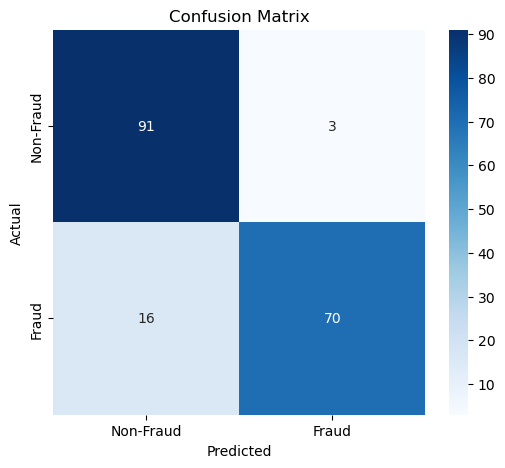

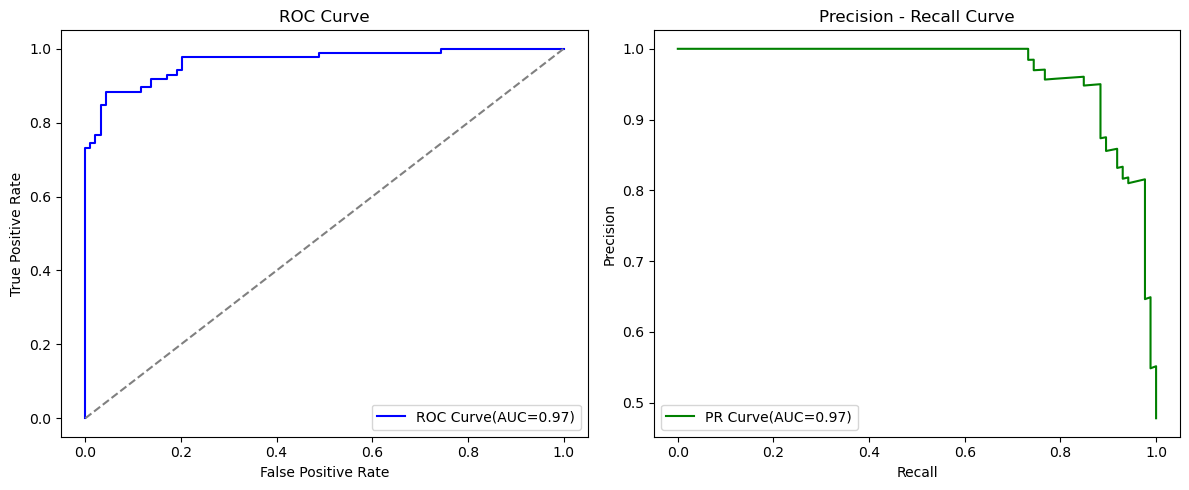

ROC-AUC Score:0.9651
PR-AUC Score:0.9693


In [119]:
# Plotting Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Plotting ROC & PR Curves
def plot_roc_pr_curves(model, X_test, y_test):
    # probabilities for positive class (fraud class, i.e., class1)
    y_probs = model.predict_proba(X_test)[:,1]
    # ROC Curve & AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve(AUC={roc_auc:.2f})")
    plt.plot([0,1],[0,1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    # PR Curve & AUC
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', label=f"PR Curve(AUC={pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision - Recall Curve")
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()
    return roc_auc, pr_auc
# Function to evaluate model & visualize results
def evaluate_and_visualize(model, X_test, y_test, class_names=['Non-Fraud', 'Fraud']):
    # Predicting the output for the test set
    y_pred = model.predict(X_test)
    # Confusion Matrix
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred, class_names)
    # ROC & PR Curve
    roc_auc, pr_auc = plot_roc_pr_curves(model, X_test, y_test)
    # Summary
    print(f"ROC-AUC Score:{roc_auc:.4f}")
    print(f"PR-AUC Score:{pr_auc:.4f}")
# Assuming 'model', 'X_test', 'y_test' are defined
evaluate_and_visualize(best_xgb, X_test, y_test, class_names=['Non-Fraud', 'Fraud'])

**For unsupervised models, evaluating the effectiveness of anomaly detection by checking identified anomalies against known fraudulent transactions.**

In [121]:
# function to compare anomalies with known frauds
def evaluate_model(y, anomalies, model_name):
    print(f"Evaluation for {model_name}\n")
    cm = confusion_matrix(y, anomalies)
    tn, fp, fn, tp = cm.ravel()
    
    # confusion matrix
    print(f"Confusion Matrix:\n{cm}\n")
    
    # Print accuracy, precision, recall, F1-score and Classification Report
    accuracy = accuracy_score(y, anomalies)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}\n")
    print("Classification Report:")
    print(classification_report(y, anomalies))
    print("\n")
    
evaluate_model(y, anomalies, "Isolation Forest")

Evaluation for Isolation Forest

Confusion Matrix:
[[470   0]
 [385  45]]

Accuracy: 0.5722
Precision: 1.0000
Recall: 0.1047
F1 Score: 0.1895

Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       470
           1       1.00      0.10      0.19       430

    accuracy                           0.57       900
   macro avg       0.77      0.55      0.45       900
weighted avg       0.76      0.57      0.46       900





### 5. Basic Explainability

**Goal: Provide insights into model behavior and feature importance.**<br>
**Steps:**
- **For the XGBoost model, extract feature importance to identify the top features impacting fraud classification.**
- **Use SHAP or another interpretability tool to explain sample predictions.**<br>

**Deliverable: Summary of top features and visual explanations for individual predictions.**

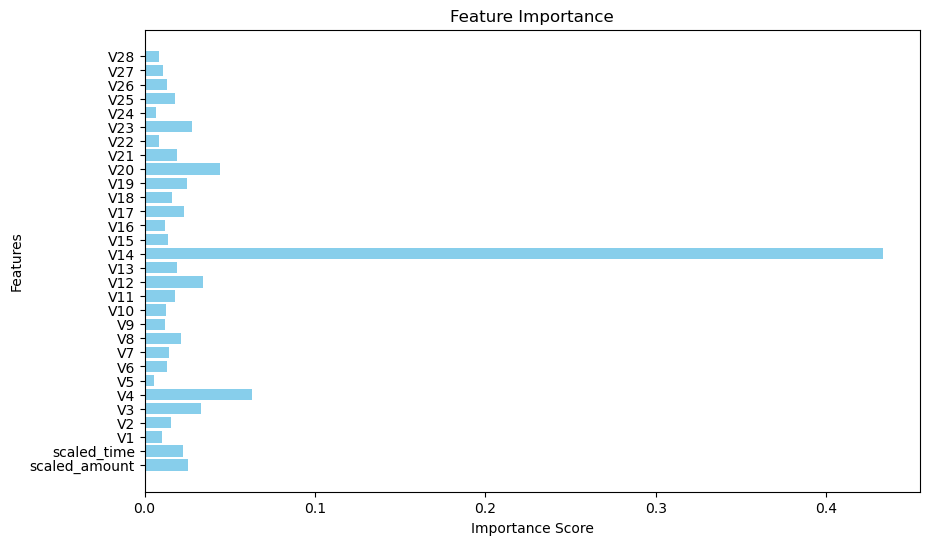

Top Features:
V14: 0.4331
V4: 0.0631
V20: 0.0442
V12: 0.0343
V3: 0.0332
V23: 0.0278
scaled_amount: 0.0253
V19: 0.0250
V17: 0.0230
scaled_time: 0.0224


In [127]:
# Get feature importances (for tree-based models like XGBoost or RandomForest)
feature_importances = best_xgb.feature_importances_

# Plot feature importance
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Print top features
sorted_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
print("Top Features:")
for feature, score in sorted_features[:10]:
    print(f"{feature}: {score:.4f}")

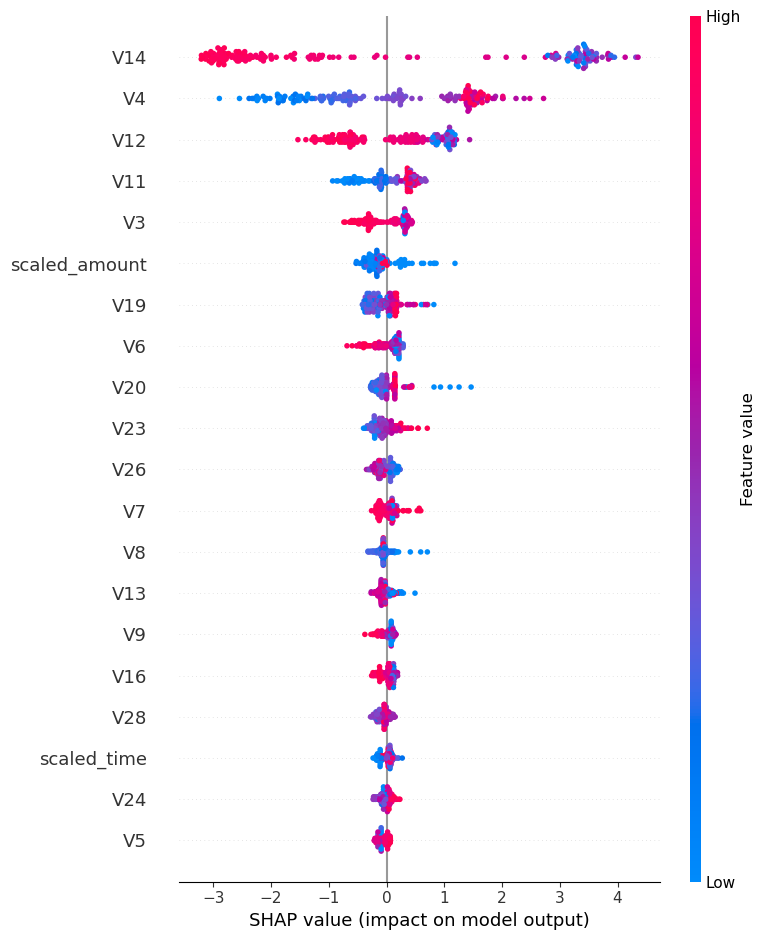

In [128]:
# SHAP Analysis for Model Interpretability
explainer = shap.TreeExplainer(best_xgb)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
# Explanation for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], feature_names=X.columns)